(grover)=
# Introducción

```{index} Grover (algoritmo)
```
El **algoritmo de grover** es uno de los algoritmos más utilizados en el mundo de la computación cuántica, y su finalidad explicada a grandes pinceladas es la siguiente: Supongamos que tenemos un conjunto desordenado de elementos y nos interesa reconocer uno de ellos. Con la computación clásica iríamos uno a uno viendo si es elemento que buscamos o no. Entonces con este método tardaríamos una media de N/2 (N es el número de elementos que tenemos). Pues bien con el algoritmo de Grover podemos reducir considerablemente ese número de intentos a $\sqrt{N}$. Es decir si N=100, con un computador clásico en media hay que hacer 50 intentos, mientras que con este algoritmo, se reducirá a $\sqrt{100}=10$ intentos.

Para una explicación algo más detallada de esto se recomiendo ver <a href='https://www.youtube.com/watch?v=xPkvB4ECVM4' target='_blank'>Este vídeo </a>, en el cual además de explicar de una forma muy intuitiva el algorimo, también tiene un documento que lo demuestra de una forma más técnica. Este documento lo podemos encontrar <a href='..\documentos\Algoritmo_Grover.pdf' target='_blank'> en este enlace </a>.

Si bien entender lo que hace el algoritmo es muy interesante, también es importante su implementación, para ello, se aconseja al lector igualmente <a href='https://www.youtube.com/watch?v=u5Yd0St6MN4&t=250s' target='_blank'> ver este vídeo </a> y el documento que explica esta implementación <a href='..\documentos\Grover_implantacion.pdf' target='_blank'> también se puede ver aquí. </a>

No obstante en este apartado vamos a profundizar con mayor grado de talle en este importante algoritmo para la computación cuántica. El esquema que define de una forma más técnica este algoritmo es el siguiente:

<center>

![](..\images\grover_I.PNG)

</center>

LO primero que hace el algoritmo es pasar el estado inicial por la puerta H, y entonces después de este paso se obtiene el estado denominado por $|s\rangle$ igual a :

$$|s\rangle=\frac{1}{\sqrt{N}}\sum_{x\in\{0,1\}}|x\rangle=\frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle$$

Para entender mejor la expresión anterior, si estamos trabajando con dos qubits inicialmente en estado básico entonces al pasarles por un puerta H se transforma en:

$$|s\rangle=\frac{1}{\sqrt{2}}\left[|00\rangle+|01\rangle+|10\rangle+|11\rangle\right]$$

## Creación del oráculo.

El segundo paso en la aplicación de este algoritmo es la creación del oráculo. Este oráculo añade añade una fase negativa al estado solución que estamos buscando. En este sentido si estamos trabajando con tres qubits y el estado que buscamos es el $w=|101\rangle$ entonces la matriz del oráculo tiene en la diagonal 1 salvo en la posición donde se invierte el qubit que en este caso sería la sexta, para ver esta posición hay que recordar lo siguiente:

$$|101\rangle = 0\cdot |000\rangle+0\cdot |001\rangle + ...+1\cdot |101\rangle +0\cdot |110\rangle+0\cdot |111\rangle $$

Por lo tanto la matriz de este oráculo es la siguiente:

$$U_{w}=\left(\begin{array}{cccccccc}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{array}\right)$$

Una forma genérica de definir el oráculo, utilizando la notación de Dirac es la siguiente:

$$U_{w}=\left(I-2|w\rangle\langle w|\right)$$

Vamos a comprobar lo anterior suponiendo que estamos trabajando con dos quibits y el estado que queremos cambiar de fase es por ejemplo $|w\rangle=|11\rangle$. Es decir en esta situación se tiene que:

$$|w\rangle=\left(\begin{array}{c}
0\\
0\\
0\\
1
\end{array}\right)$$

Puesto que $|11\rangle=0\cdot|00\rangle+0\cdot|01\rangle+0\cdot|10\rangle+1\cdot|11\rangle\rangle$.

Calculemos pues el valor de $\left(I-2|w\rangle\langle w|\right)$

$$
\begin{align*}
U_{w} & =\left(I-2|w\rangle\langle w|\right)=\left(\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{array}\right)-2\left(\begin{array}{c}
0\\
0\\
0\\
1
\end{array}\right)\left(\begin{array}{cccc}
0 & 0 & 0 & 1\end{array}\right)=\left(\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{array}\right)-2\left(\begin{array}{cccc}
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1
\end{array}\right)=\\
= & \left(\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{array}\right)
\end{align*}$$

Existen muchos problemas computacionales para los que es difícil encontrar una solución, pero es relativamente fácil comprobar si un determinado valor verifica una condición. Para este tipo de problemas, podemos crear una función f que tome como argumento una posible solución y devuelva f(x)=0 si x no es una solución y f(x)=1 si x es la solución que buscamos. Entonces nuestra función oráculo sería la siguiente:

$$U_{w}|w\rangle=(-1)^{f(x)}|x\rangle$$

Y en consecuencia la matriz sería la siguiente:

$$U_{w}=\left(\begin{array}{cccc}
(-1)^{f(0)} & 0 & ... & 0\\
0 & (-1)^{f(1)} & ... & 0\\
\vdots & 0 & \ddots & \vdots\\
0 & 0 & \ldots & (-1)^{f(2^{n}-1)}
\end{array}\right)$$

## Creación de operador de difusión

Por regla general este operador de difusión tiene el siguiente aspecto.

![](../images/operadorDifusion.PNG)


<a href='..\documentos\Grover_implantacion.pdf' target='_blank'> En este documento  </a> se demuestra que el operador de difusión se puede implementar mediante el siguiente circuito:

![](../images/PuertaGrover.PNG)

Pero como en qiskit no podemos implementar de una forma directa multicontrol z que se muestra en la figura anterior, este control se implementa mediante otro análogo e igual al siguiente:

![](../images/multicontrolZ.PNG)

Construido con la ayuda de Quirk y gracias al mismo se puede comprobar que los dos circuitos son exactamente los mismos.

A continuación podemos ver un ejemplo de este algoritmo.

In [1]:
# Importamos las librerías necesarias

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

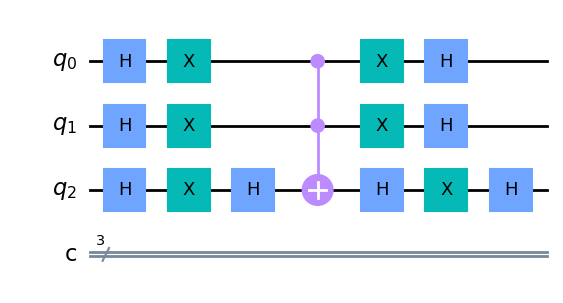

In [2]:
# Implementamos la puerta de Grover

Grover = QuantumCircuit(3,3)

Grover.h(range(3))
Grover.x(range(3))

#CORRECCIÓN !!!
# Si el ccz lo implementamos de esta manera estaremos cambiando algunas amplitudes que no debemos
# la solución está en recordar que Z = HXH


Grover.h(2)
Grover.ccx(0,1,2) # esto es el cccx, el primer parámetro indica los qubits de control, el segundo
Grover.h(2)             # el qubit objetivo. Finalmente poned un cero, no deis importancia a ese valor
#Grover.ccx(0,1,2)

#Grover.x(2)
#Grover.z(2)
3#Grover.x(2)
#Grover.mct(range(2),2,0)
#Grover.ccx(0,1,2)

Grover.x(range(3))
Grover.h(range(3))

Grover.draw(output = "mpl")

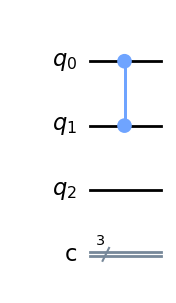

In [3]:
# Esta es la función que podeis cambiar para buscar nuevos elementos

Detector = QuantumCircuit(3,3)

Detector.cz(1,0)
Detector.draw(output = "mpl")

Me interesa buscar lo elementos que la puerta anterior cambia de signo. se puede comprobar que los que cambian de signo son el 011 y el 111, ya que la puerta z transforma el 0 en 0 y el ket 1 en -1

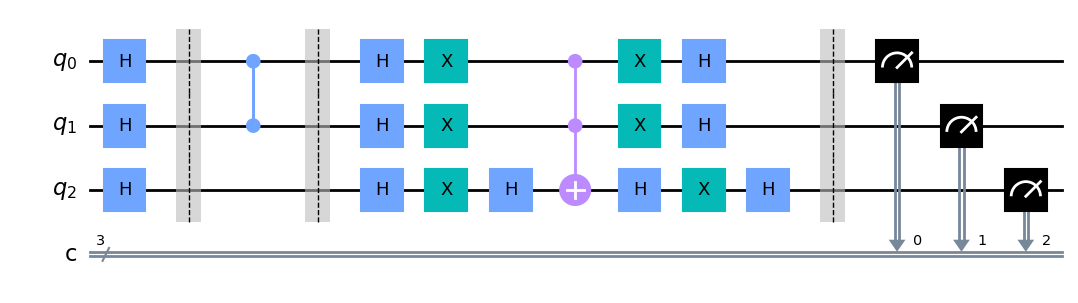

In [4]:
circ = QuantumCircuit(3,3)
circ.h(range(3))
circ.barrier(range(3))
#circ = circ + Detector
circ = circ.compose(Detector)
circ.barrier(range(3))
#circ = circ + Grover
circ = circ.compose(Grover)
circ.barrier(range(3))
circ.measure(range(3), range(3))
circ.draw(output = "mpl")

Construimos a continuación el circuito para aplicar el algoritmo de grover

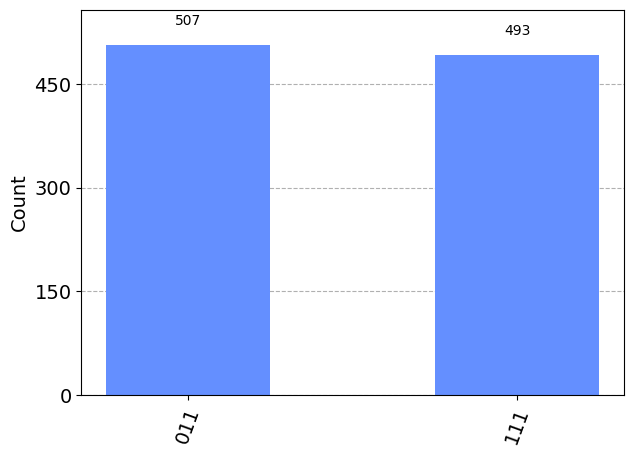

In [5]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circ, backend, shots = 1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Implementemos a continuación otro ejmeplo para un total de dos qubits y suponiendo que $|w\rangle = |11\rangle$.

In [6]:
#inicialización importando las librerías correspondientes
import matplotlib.pyplot as plt
import numpy as np
import math

# importamos qiskit
from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
#from qiskit.providers.ibmq import least_busy

# herramientas para histograma
from qiskit.visualization import plot_histogram

Comenzamos creando el circuito inicial de dos qubits

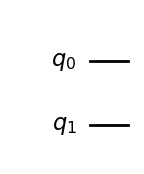

In [7]:
n = 2
grover_circuit = QuantumCircuit(n)
grover_circuit.draw('mpl')

Aplicamos una puerta H para obtener el estado $|s\rangle$ que hemos llamamo an l parte teórica

In [8]:
def initialize_s(qc, qubits):
    """Con esta aplicación damos el primer paso en la implementación del algoritmo de Grover.
    Lo primero es aplicar un apuerta H.

    @patameter:
    - qc es el circuito
    - qubits: un lista de los qubits del circuito
    
    """
    for q in qubits:
        qc.h(q)
    return qc

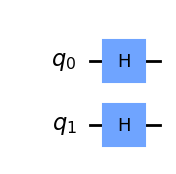

In [9]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw('mpl')

A continuación construimos el oráculo. Suponemos que $|w\rangle = |11\rangle$. Entonces de acuerdo con los visto anteriormente y para este estado cuántico, el oráculo $U_w$ será una matriz de orden 4x4 con 1 en la diagonal salvo el cuarto que sería igual a -1. Esto lo podemos contruir con una puerta contro z. ya que no olvidemo la puerta z es igual a:

$\left(\begin{array}{cc}
1 & 0\\
0 & -1
\end{array}\right)$

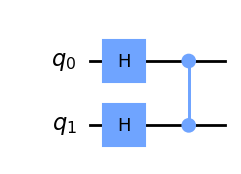

In [10]:
grover_circuit.cz(0,1) # Oracle
grover_circuit.draw('mpl')

Ahora cramos y añadimos el difusor

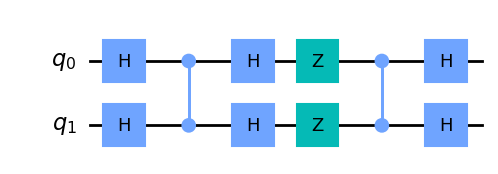

In [11]:
#operador difusor

grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw('mpl')

In [12]:
#Ejecutamos y obtenemos el vector de estado
sv_sim = Aer.get_backend('statevector_simulator')
result = sv_sim.run(grover_circuit).result()
statevec = result.get_statevector()
from qiskit.visualization import array_to_latex
array_to_latex(statevec, prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

Como esperabamos, las amplitudes de los tres primeros estados son cero mientras que para el cuarto estado es 1.

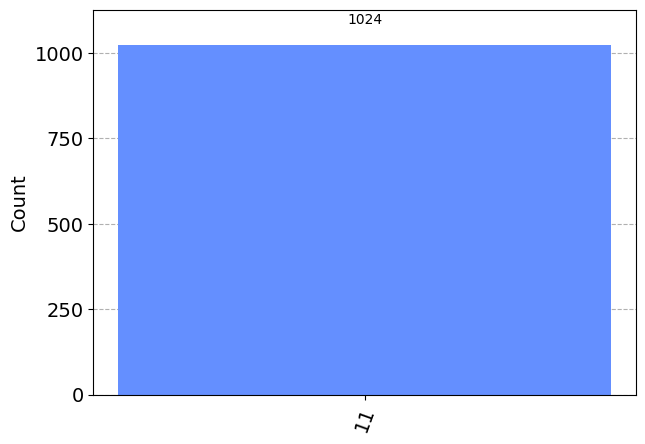

In [13]:
# ahora medimos
grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(grover_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

Hagamos ahora el ejemplo pear tres qubits, y los estados a localizar serían el $|101\rangle$ y $|110\rangle$. El esquema del circuito que resuelve el problema sería el siguiente:

![](../images/grover_II.PNG)

In [14]:
qc = QuantumCircuit(3)
# Creamos el oráculo
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"


A continuación vamos a construir una función que nos permite construir un difusor para cualquier número de qubits (Para más información sobre esto <a href="https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/grover.ipynb"  target="_blank"> ver este enlace </a>). 

In [15]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

Ahora utilizamos  todos los códigos ya expuestos anteriormente:

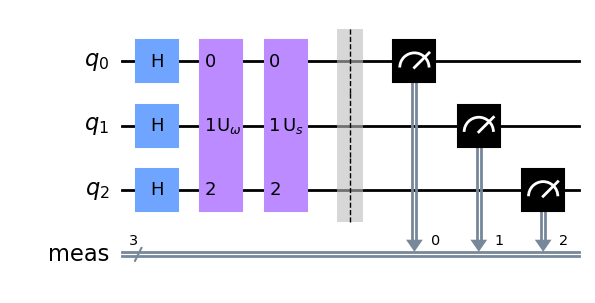

In [16]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw('mpl')

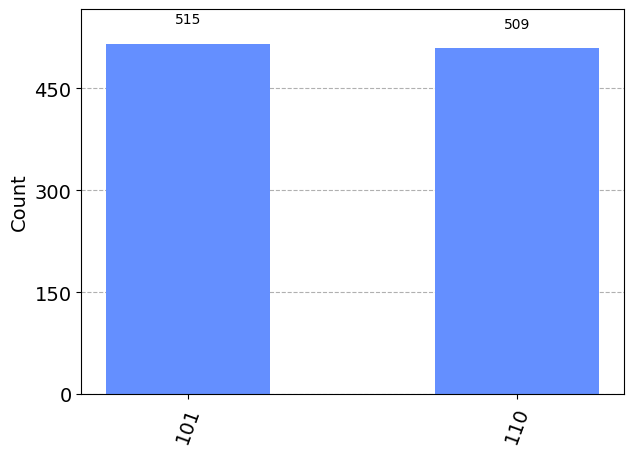

In [17]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(grover_circuit, qasm_sim)
results = qasm_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

## Solución del algoritmo de Grover con grover_problem_oracle.

A continuación vamos a ver cómo resolver este tipo de problemas con el paquete qiskit_textbook.problems y la función *grover_problem_oracle*:


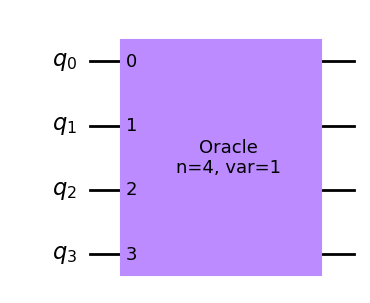

In [18]:
from qiskit_textbook.problems import grover_problem_oracle
## Ejemplo de uso
n = 4
oracle = grover_problem_oracle(n, variant=1)  # 0th variant of oracle, with n qubits
qc = QuantumCircuit(n)
qc.append(oracle, [0,1,2,3])
qc.draw('mpl')